In [242]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [243]:
# loading data
datapath = "/home/mjolnir/Desktop/DeepL/Projects /DiseaseData/Training.csv"
data = pd.read_csv(datapath).dropna(
    axis=1
)  # we use dropna to remove all columns that have null data
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [244]:
# checking whether the dataset is balanced or not
disease_count = data["prognosis"].value_counts()
disease_count[:15] # showing first 5 entries of disease count

Fungal infection                120
Hepatitis C                     120
Hepatitis E                     120
Alcoholic hepatitis             120
Tuberculosis                    120
Common Cold                     120
Pneumonia                       120
Dimorphic hemmorhoids(piles)    120
Heart attack                    120
Varicose veins                  120
Hypothyroidism                  120
Hyperthyroidism                 120
Hypoglycemia                    120
Osteoarthristis                 120
Arthritis                       120
Name: prognosis, dtype: int64

In [245]:
temp_data = pd.DataFrame({"Disease": disease_count.index, "count": disease_count.values})
temp_data[:6]

,Disease,count
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120


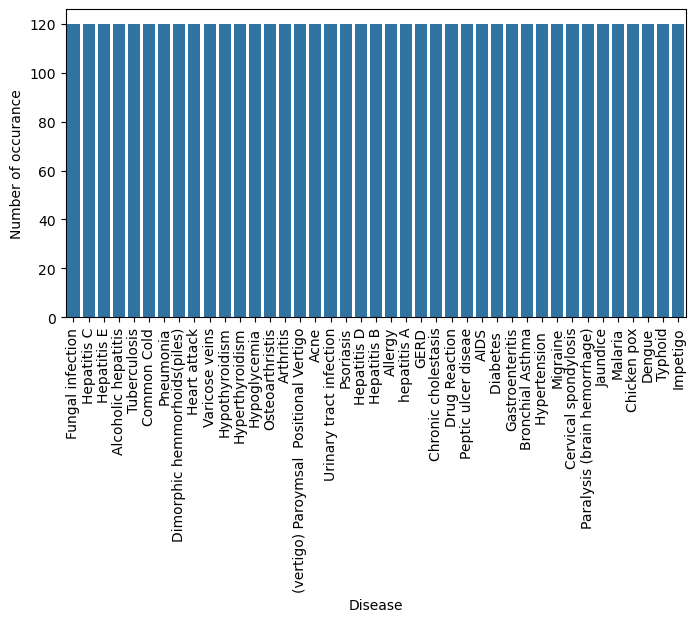

In [246]:
temp_data = pd.DataFrame(
    {"Disease": disease_count.index, "Number of occurance": disease_count.values}
)

plt.figure(figsize = (8,4))
sns.barplot(x = "Disease", y = "Number of occurance",data=temp_data)
plt.xticks(rotation=90)
plt.show()

In [247]:
# Encode the target value into numerical values
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
data["prognosis"][:15]

0     15
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10     4
11     4
12     4
13     4
14     4
Name: prognosis, dtype: int64

In [248]:
# Selection of x data without the encoded lables
# Selection of the y data  which is the encoded labels.

X =data.iloc[:,:-1]    # Selecting all rows and columns but the last one.iloc---> integer location
Y =data.iloc[:,-1]     # Selecting all rows of  the last column(lable).

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [249]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X,Y):
    return accuracy_score(Y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X,Y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier:100.0
Accuracy on test data by SVM Classifier: 100.0


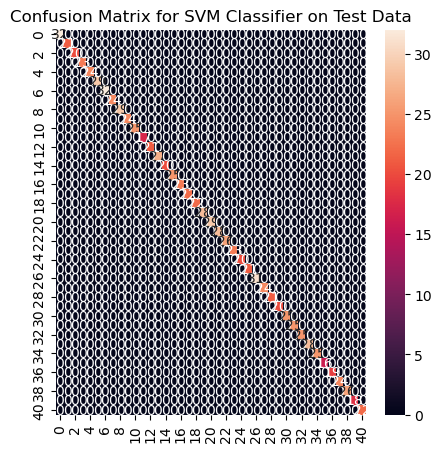

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


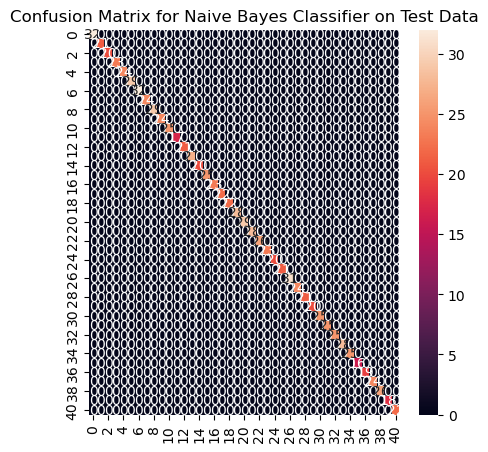

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


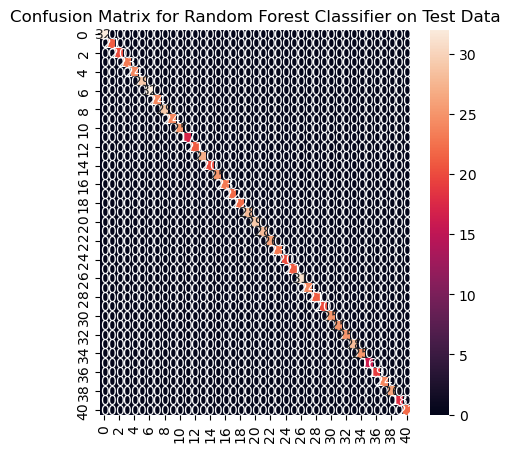

In [250]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
:{accuracy_score(y_train,svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()




/tmp/ipykernel_86092/2388298525.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds.append(mode([i, j, k])[0][0])


Accuracy on Test dataset by combined model:100.00%


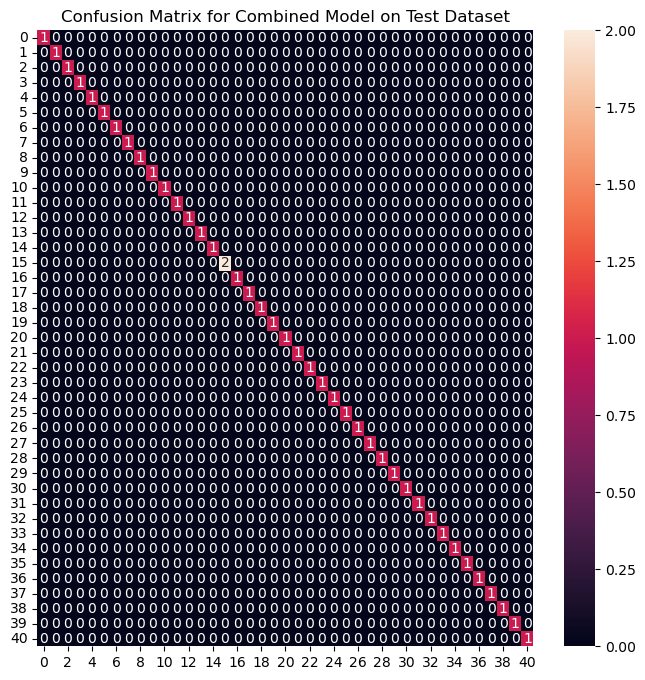

In [251]:
# Training the models on whole data

final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)
final_svm_model.fit(X,Y)
final_nb_model.fit(X,Y)
final_rf_model.fit(X,Y)

# Import the test data
test_data = pd.read_csv("/home/mjolnir/Desktop/DeepL/Projects /DiseaseData/Testing.csv")
X_test =test_data.iloc[
    :, :-1
]  # Selecting all rows and columns but the last one.iloc---> integer location
Y_test = encoder.fit_transform(test_data.iloc[:, -1])  #Selecting all rows of  the last column(lable). Transform into numbers.

# Make  predictions using each model
Svm_preds= final_svm_model.predict(X_test)
Nb_preds = final_nb_model.predict(X_test)
Rf_Preds = final_rf_model.predict(X_test)

final_preds = []
for i, j, k in zip(Svm_preds, Nb_preds, Rf_Preds):
    final_preds.append(mode([i, j, k])[0][0])
    
print(f"Accuracy on Test dataset by combined model:{accuracy_score(Y_test ,final_preds)*100:.2f}%")


cf_matrix = confusion_matrix(Y_test, final_preds)
plt.figure(figsize=(8,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [253]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {"symptom_index": symptom_index, "predictions_classes": encoder.classes_}


# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][
        final_rf_model.predict(input_data)[0]
    ]
    nb_prediction = data_dict["predictions_classes"][
        final_nb_model.predict(input_data)[0]
    ]
    svm_prediction = data_dict["predictions_classes"][
        final_svm_model.predict(input_data)[0]
    ]

    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction,
    }
    return predictions


# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/home/mjolnir/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/mjolnir/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/mjolnir/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipykernel_86092/1292016383.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn